In [54]:
 #Business Problem- Supplier performance Analysis
#importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display im port display
import plotly.express as px


In [16]:
#importation of Data

#df=pd.read_csv('simple_vegetable_sales_data.csv')
df1=pd.read_csv('Vegetable_market.csv')
df1

df1.info()

#Removing 'Month' column
column_to_remove = 'Month'
if column_to_remove in df1:
    df1.drop(column_to_remove, axis=1, inplace=True)

# Save the modified DataFrame back to a CSV file
df1.to_csv('modified_file.csv', index=False)
#Confirming column was removed
print(df1.columns)

# Reading the first CSV file into a DataFrame
df = pd.read_csv('simple_vegetable_sales_data.csv')

# Reading the second CSV file
df1 = pd.read_csv('Vegetable_market.csv') 

# Concatenating dataframes along the rows
combined_df = pd.concat([df, df1], ignore_index=True)

# Saving the combined data to a new CSV file
combined_df.to_csv('combined_files.csv', index=False)

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
0,potato,winter,jan,15,no,fresh,20
1,tomato,winter,jan,15,no,fresh,50
2,peas,winter,jan,15,no,fresh,70
3,pumkin,winter,jan,15,no,fresh,25
4,cucumber,winter,jan,15,no,fresh,20
...,...,...,...,...,...,...,...
116,brinjal,winter,jan,15,yes,fresh,33
117,ginger,winter,jan,15,no,fresh,88
118,potato,summer,apr,32,no,fresh,24
119,peas,summer,apr,33,no,fresh,33


In [63]:
#DATA CLEANING
#combined_df.isna().sum()

# Check the shape (rows and columns) of the combined dataset
#print("Combined Dataset Shape:", combined_df.shape)

combined_df.info() 

#Checking for missing/null values
#combined_df.isnull().sum()
#df.dropna(inplace=True) #Removing rows with missing values

#Filling

# Assuming combined_df is your DataFrame
filled_data = combined_df['Price per kg'].fillna(np.mean(combined_df['Price per kg']), inplace=True)
filled_data = combined_df['Sales(kg)'].fillna(np.mean(combined_df['Sales(kg)']), inplace=True)

#Checking for missing/null values
combined_df.isnull().sum()

#checking for duplicates
#combined_df.duplicated().sum()
#Remove Duplicate
df_no_duplicates = combined_df.drop_duplicates()

# Drop rows with any null values
cleaned_df = combined_df.dropna()

# Drop columns with any null values
cleaned_df = combined_df.dropna(axis=1)

# Fill null values with a specific value
filled_df = combined_df.fillna(0)

# # Display a summary of the merged dataset
# print(combined_df.info())
# print(combined_df.head())


Month                                0
Sales(kg)                          121
Supplier_Name                      121
Vegetable                          360
Season                             360
Temp                               360
Deasaster Happen in last 3month    360
Vegetable condition                360
Price per kg                       360
dtype: int64

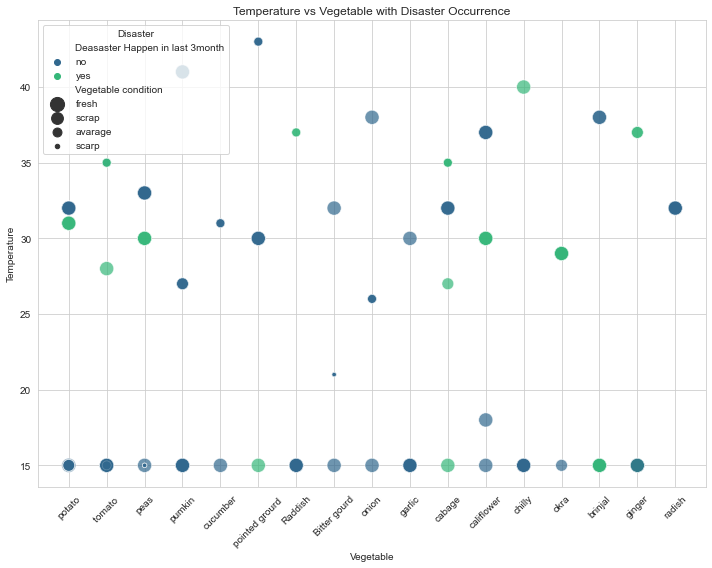

In [106]:
#VISUALIZATION
#Scatter plot visualizing how temperature varies concerning different vegetables with points colored based on disaster occurence and sized based on vegetable conditions
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Vegetable', y='Temp', hue='Deasaster Happen in last 3month', size='Vegetable condition',
                sizes=(20, 200), alpha=0.7, data=combined_df, palette='viridis')
plt.title('Temperature vs Vegetable with Disaster Occurrence')
plt.xlabel('Vegetable')
plt.ylabel('Temperature')
plt.legend(title='Disaster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Radish ,bitter guard,onions have not incured any disaster in the last 3months and they grow well in all conditions


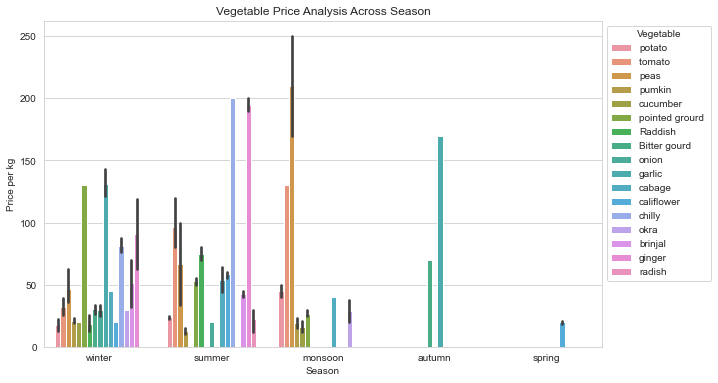

In [98]:
# Grouped Bar Chart visualizing vegetable Price Analysis across Seasons
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

sns.barplot(x='Season', y='Price per kg', hue='Vegetable', data=combined_df)
plt.title('Vegetable Price Analysis Across Season')
plt.xlabel('Season')
plt.ylabel('Price per kg')
plt.legend(title='Vegetable', bbox_to_anchor=(1, 1), loc='upper left')  # Adjust legend position

plt.show()

In [107]:
# Assuming df is your DataFrame containing 'Supplier_Name', 'Vegetable', and 'Price_per_kg' columns

# Grouping by Supplier and Vegetable to analyze the price offered by each supplier for each vegetable
supplier_veg_price = combined_df.groupby(['Supplier_Name', 'Vegetable'])['Price per kg'].mean().reset_index()

# Visualizing supplier performance based on vegetable prices using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Supplier_Name', y='Price per kg', hue='Vegetable', data=supplier_veg_price)
plt.title('Supplier Performance Based on Vegetable Prices')
plt.xlabel('Supplier')
plt.ylabel('Average Price per kg')
plt.legend(title='Vegetable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 864x432 with 0 Axes>

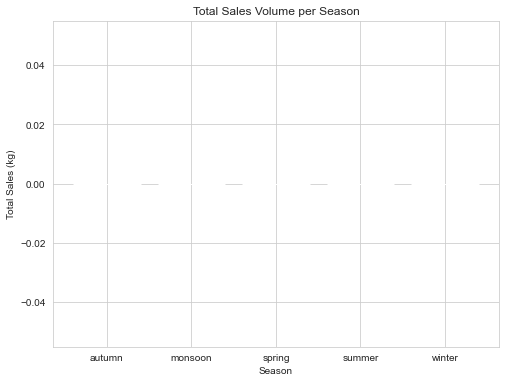

In [73]:
# Group by season and sum the sales
seasonal_sales = combined_df.groupby('Season')['Sales(kg)'].sum().reset_index()

# Create a bar plot for seasonal sales trends
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(seasonal_sales['Season'], seasonal_sales['Sales(kg)'])
plt.xlabel('Season')
plt.ylabel('Total Sales (kg)')
plt.title('Total Sales Volume per Season')
plt.show()


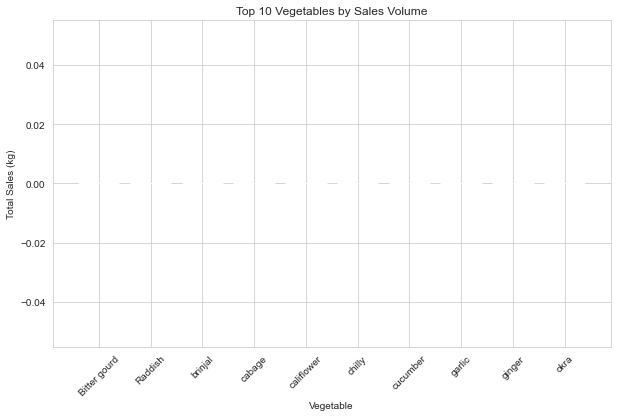

In [74]:
# Calculate total sales for each vegetable type
vegetable_sales = combined_df.groupby('Vegetable')['Sales(kg)'].sum().reset_index()

# Select top 10 vegetables by sales volume
top_10_vegetables = vegetable_sales.nlargest(10, 'Sales(kg)')

# Create a bar chart for sales distribution
plt.figure(figsize=(10, 6))
plt.bar(top_10_vegetables['Vegetable'], top_10_vegetables['Sales(kg)'])
plt.xlabel('Vegetable')
plt.ylabel('Total Sales (kg)')
plt.title('Top 10 Vegetables by Sales Volume')
plt.xticks(rotation=45)
plt.show()


TypeError: 'value' must be an instance of str or bytes, not a float

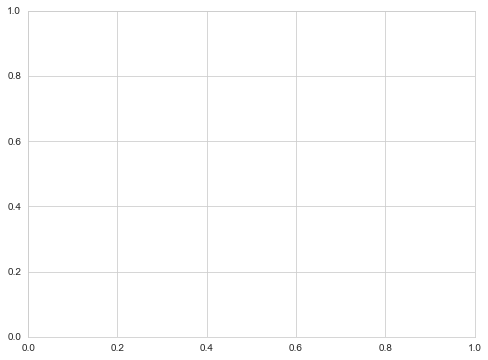

In [78]:
# Create a scatter plot to analyze the correlation
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['Supplier_Name'], combined_df['Sales(kg)'])
plt.xlabel('Supplier')
plt.ylabel('Sales Volume')
plt.title('Correlation between supplier and Sales')
plt.show()


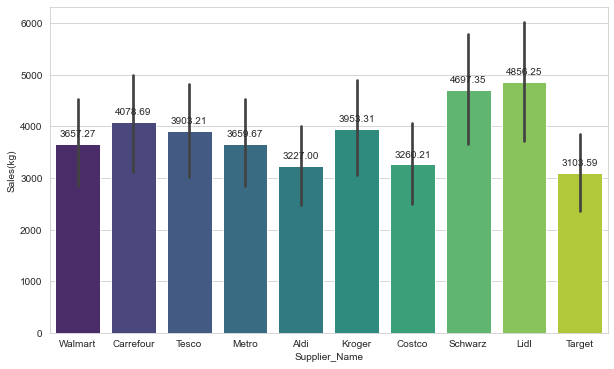

In [35]:
#Visualization
#Bar plot  visualizing comparing sales performance(kg) of different suppliers
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Supplier_Name', y='Sales(kg)', data=combined_df, estimator=np.mean, palette='viridis')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')
# Other plot customization...
plt.show()


In [36]:
#Interactive visualization displaying sales trend by supplier
def plot_sales_trends_colorful(selected_supplier):  #Function takes 'selected_supplier' argument
    if not selected_supplier:
        return

    selected_data = combined_df[combined_df['Supplier_Name'].isin(selected_supplier)]
  
    plt.figure(figsize=(10, 6))
    for supplier, data in selected_data.groupby('Supplier_Name'):
        sns.lineplot(x='Month', y='Sales(kg)', data=data, label=supplier, marker='o')

    plt.title('Sales Trends by Supplier')
    plt.xlabel('Month')
    plt.ylabel('Sales (kg)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

unique_suppliers = df['Supplier_Name'].unique()
supplier_selector = widgets.SelectMultiple(
    options=unique_suppliers,
    value=[unique_suppliers[0]],  # Default selection
    description='Select Supplier:',
    disabled=False
)

widgets.interactive(plot_sales_trends_colorful, selected_supplier=supplier_selector)


interactive(children=(SelectMultiple(description='Select Supplier:', index=(0,), options=('Walmart', 'Carrefou…

In [ ]:
#Identify Top-Performing suppliers in terms of sales volume and consistency

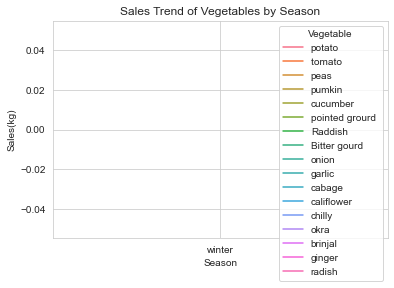

In [69]:
# Visualization for sales trends for a particular Vegetable across seasons

sns.lineplot(x='Season', y='Sales(kg)', hue='Vegetable', data=combined_df)
plt.title('Sales Trend of Vegetables by Season')
plt.show()


In [37]:
#Seasonal demand analysis
# Group data by month and season, summing the sales for each combination
seasonal_sales = combined_df.groupby(['Month', 'Season', 'Vegetable'])['Sales(kg)'].sum().reset_index()

# Find the most sold vegetable per season
top_selling_per_season = seasonal_sales.loc[seasonal_sales.groupby('Season')['Sales(kg)'].idxmax()]

# Display the top-selling vegetable per season
print("Top selling vegetable per season:")
print(top_selling_per_season)

# Calculate total sales per month
monthly_sales = combined_df.groupby(['Month'])['Sales(kg)'].sum()

# Display total sales per month
print("\nTotal sales per month:")
print(monthly_sales)


Top selling vegetable per season:
    Month   Season   Vegetable     Sales(kg)
42    oct   autumn      garlic   3839.655694
9     aug  monsoon        okra  15358.622778
37  march   spring  califlower  11518.967083
5     apr   summer        peas  15358.622778
30    jan   winter     tomato   30717.245556

Total sales per month:
Month
1         37489.240000
2         45818.060000
3         51292.070000
4         58309.220000
5         63525.620000
6         68918.820000
7         72426.710000
8         75437.250000
9         76553.770000
10        76810.810000
11        76081.910000
12        74015.030000
13        70419.810000
14        66435.440000
15        61500.770000
16        54727.660000
17        47969.750000
18        41755.470000
19        36266.210000
20        27663.780000
21        21234.690000
22        16599.840000
23         9151.650000
24         5794.390000
25         2696.980000
26          993.620000
27         1374.250000
28          762.350000
29         2567.630000

In [47]:
#Visualizing mean sales per supplier across different months using Plotly express
#Computing a pivot table calc mean sales across suppliers
supplier_means = df.pivot_table(values='Sales(kg)', index='Month', columns='Supplier_Name', aggfunc='mean')

# Resetting index to ensure 'Month' becomes a column (optional, depending on the DataFrame structure)
supplier_means = supplier_means.reset_index()

# Melt the DataFrame to transform 'Supplier_Name' columns into a single column for the line plot
melted_supplier_means = supplier_means.melt(id_vars='Month', var_name='Supplier_Name', value_name='Mean_Sales')
#ploting a line plot
fig = px.line(melted_supplier_means, x='Month', y='Mean_Sales', color='Supplier_Name',
              title='Mean Sales per Supplier across Months',
              labels={'Month': 'Month', 'Mean_Sales': 'Mean Sales', 'Supplier_Name': 'Supplier'})
fig.show()


In [70]:
# Create a correlation heatmap
pivot_df = combined_df.pivot(index='Season', columns='Vegetable', values='Sales(kg)')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Sales of Vegetables by Season')
plt.show()



ValueError: Index contains duplicate entries, cannot reshape